# **Data Cleaning & Preparation:**

In [1]:
# Import libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset.

customer_churn_data = pd.read_csv("/content/customer_churn_dataset.csv")

customer_churn_data

,CustomerID,Gender,Age,Tenure,ContractType,InternetService,TechSupport,MonthlyCharges,TotalCharges,Churn
0,1,Male,34,34,Month-to-Month,Fiber optic,0,93.74,3187.16,0
1,2,Female,26,11,One Year,Fiber optic,0,48.65,535.15,1
2,3,Male,50,41,Month-to-Month,Fiber optic,1,100.26,4110.66,0
3,4,Male,37,56,Month-to-Month,Fiber optic,1,119.72,6704.32,1
4,5,Male,30,3,One Year,DSL,1,23.00,69.00,0
...,...,...,...,...,...,...,...,...,...,...
995,996,Male,42,14,Month-to-Month,Fiber optic,1,93.50,1309.00,1
996,997,Male,26,36,Two Years,DSL,1,81.01,2916.36,1
997,998,Female,21,33,Two Years,No,0,68.82,2271.06,1
998,999,Female,31,23,Month-to-Month,No,0,33.32,766.36,0


In [3]:
customer_churn_data.shape

(1000, 10)

In [4]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Gender           1000 non-null   object 
 2   Age              1000 non-null   int64  
 3   Tenure           1000 non-null   int64  
 4   ContractType     1000 non-null   object 
 5   InternetService  1000 non-null   object 
 6   TechSupport      1000 non-null   int64  
 7   MonthlyCharges   1000 non-null   float64
 8   TotalCharges     1000 non-null   float64
 9   Churn            1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.2+ KB


In [5]:
# Check for missing values in the dataset

missing_values = customer_churn_data.isnull().sum()

missing_values

,0
CustomerID,0
Gender,0
Age,0
Tenure,0
ContractType,0
InternetService,0
TechSupport,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [6]:
# Summary statistics for numeric columns to inspect outliers.

numeric_summary = customer_churn_data.describe()

numeric_summary

,CustomerID,Age,Tenure,TechSupport,MonthlyCharges,TotalCharges,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.799000,29.420000,0.507000,68.544760,2055.224800,0.505000
std,288.819436,15.133857,16.818873,0.500201,28.642029,1558.375379,0.500225
min,1.000000,18.000000,1.000000,0.000000,20.000000,28.060000,0.000000
25%,250.750000,31.000000,15.000000,0.000000,43.377500,766.245000,0.000000
50%,500.500000,44.000000,29.000000,1.000000,67.740000,1633.090000,1.000000
75%,750.250000,57.000000,44.000000,1.000000,93.020000,3101.475000,1.000000
max,1000.000000,69.000000,59.000000,1.000000,119.960000,7032.800000,1.000000


In [7]:
# Frequency distribution for categorical columns.

customer_churn_data['ContractType'].value_counts()

,count
ContractType,
Month-to-Month,349
One Year,332
Two Years,319


In [8]:
customer_churn_data['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


In [9]:
customer_churn_data['InternetService'].value_counts()

,count
InternetService,
DSL,353
No,338
Fiber optic,309


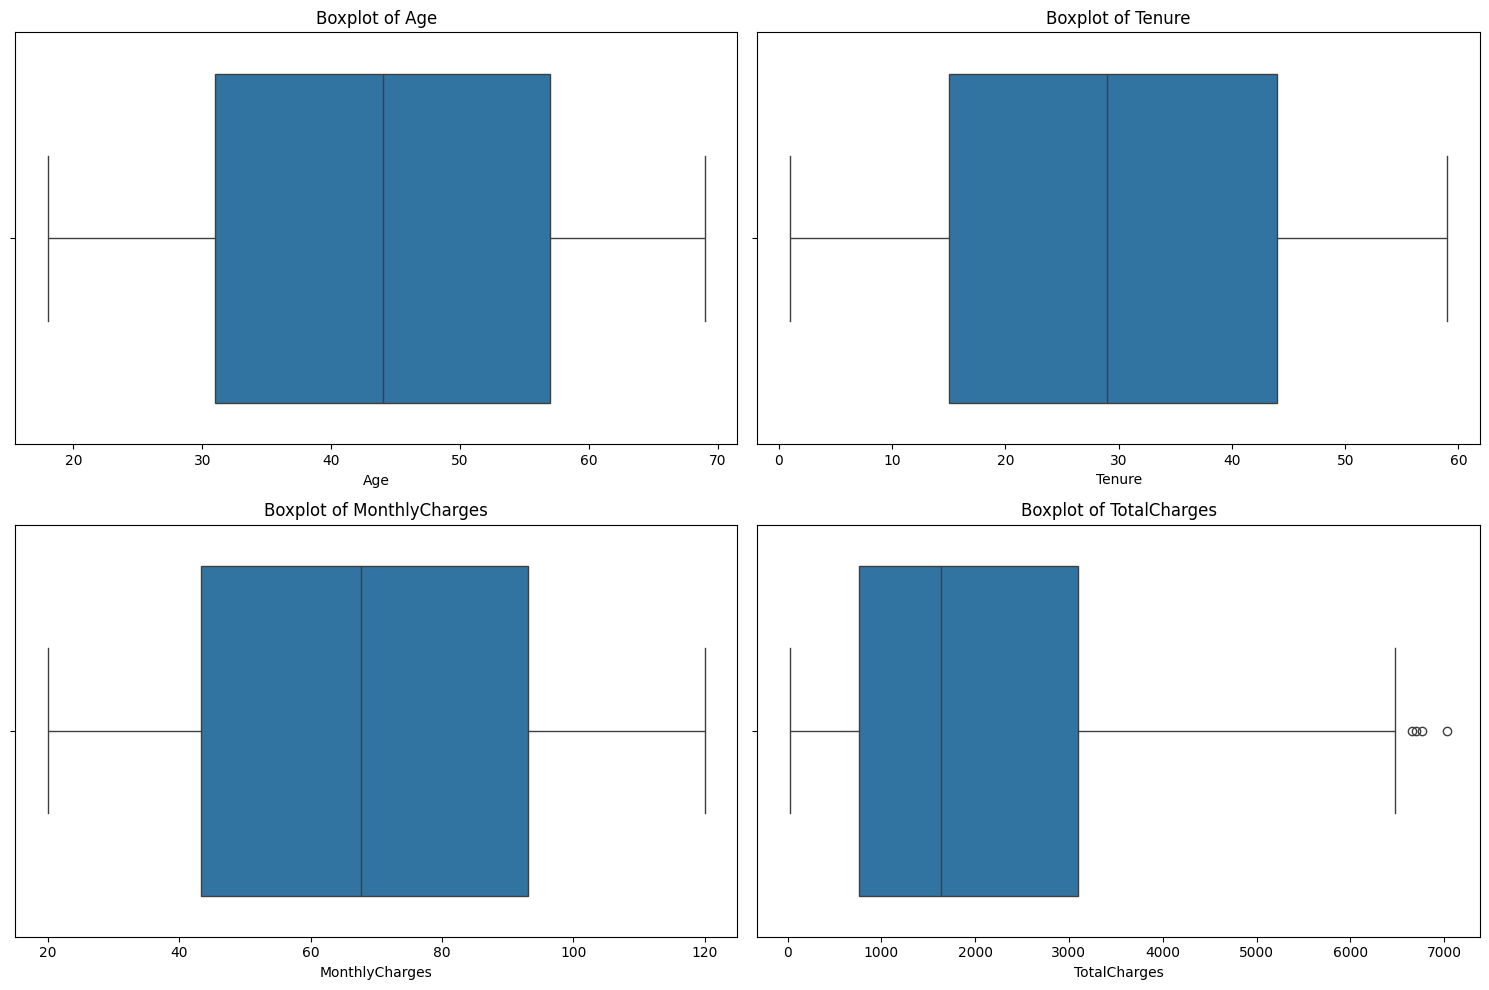

In [10]:
# detecting outliers in numeric columns.

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize numeric data distributions to identify outliers
numeric_columns = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=customer_churn_data, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [11]:
# Investigated high values in MonthlyCharges and TotalCharges.

high_monthly_charges = customer_churn_data[customer_churn_data['MonthlyCharges'] > 110]
high_total_charges = customer_churn_data[customer_churn_data['TotalCharges'] > 6000]

# Displayed details of customers with high charges.

high_monthly_charges_info = high_monthly_charges[['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges']]
high_total_charges_info = high_total_charges[['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges']]

high_monthly_charges_info


,CustomerID,Tenure,MonthlyCharges,TotalCharges
3,4,56,119.72,6704.32
7,8,29,117.34,3402.86
13,14,42,117.53,4936.26
16,17,40,113.80,4552.00
27,28,5,117.31,586.55
...,...,...,...,...
946,947,29,117.82,3416.78
963,964,3,119.65,358.95
969,970,51,114.93,5861.43
971,972,54,110.70,5977.80


In [12]:
high_total_charges_info

,CustomerID,Tenure,MonthlyCharges,TotalCharges
3,4,56,119.72,6704.32
5,6,59,109.74,6474.66
45,46,58,106.47,6175.26
62,63,59,102.24,6032.16
205,206,59,114.72,6768.48
302,303,54,113.83,6146.82
329,330,58,104.09,6037.22
383,384,55,115.81,6369.55
536,537,56,118.84,6655.04
560,561,59,119.20,7032.80


# **Exploratory Data Analysis (EDA):**

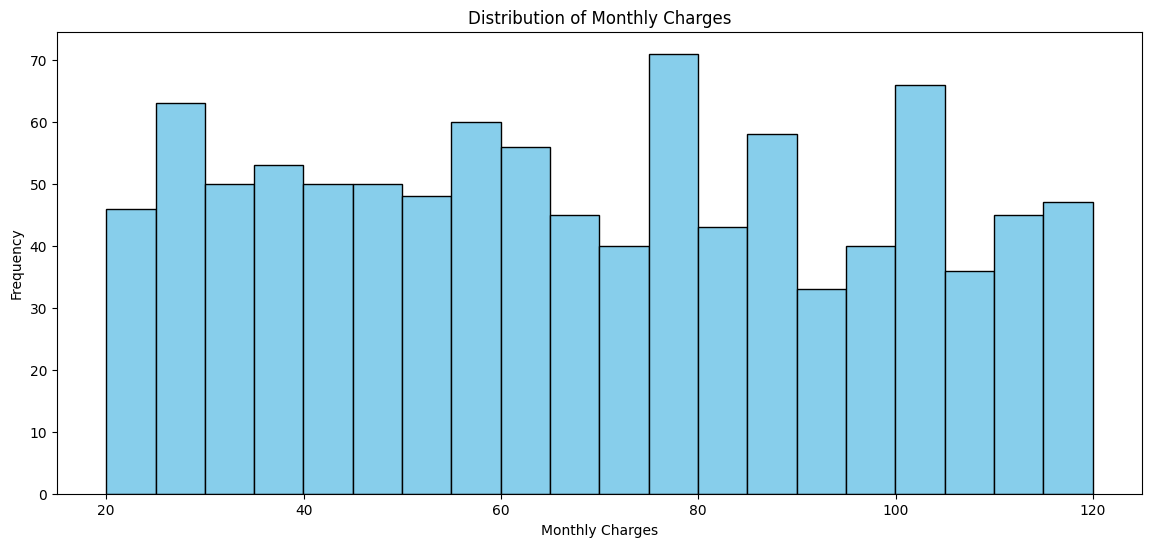

In [13]:
# Histogram.

plt.figure(figsize=(14, 6))
plt.hist(customer_churn_data['MonthlyCharges'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

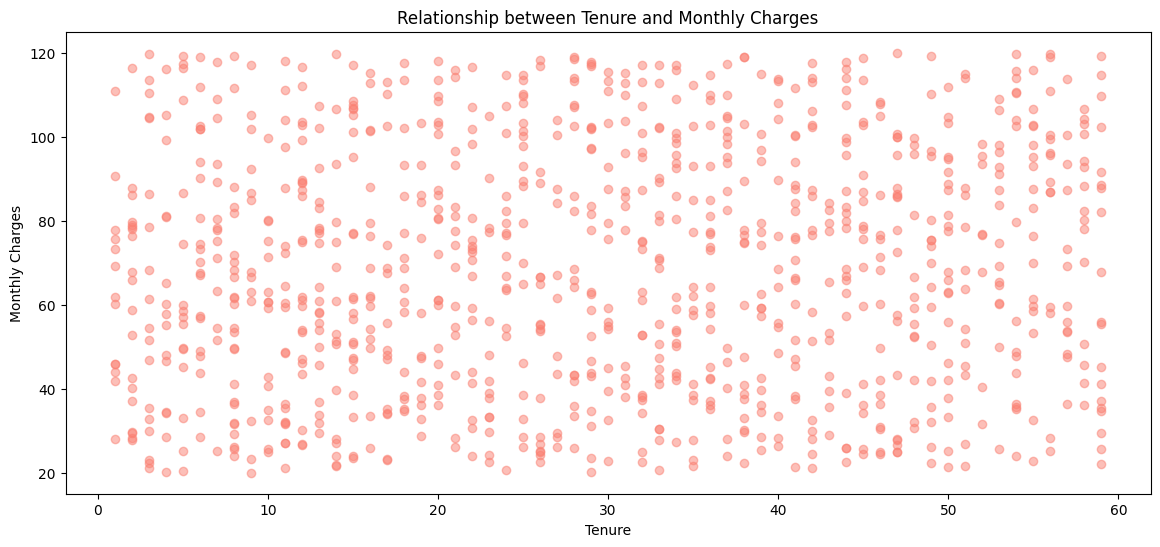

In [14]:
# Scatter plot.

plt.figure(figsize=(14, 6))
plt.scatter(customer_churn_data['Tenure'], customer_churn_data['MonthlyCharges'], alpha=0.5, color='salmon')

plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Relationship between Tenure and Monthly Charges')
plt.show()

Box plots are helpful for comparing the distribution of a numeric variable across different categories of a categorical variable.

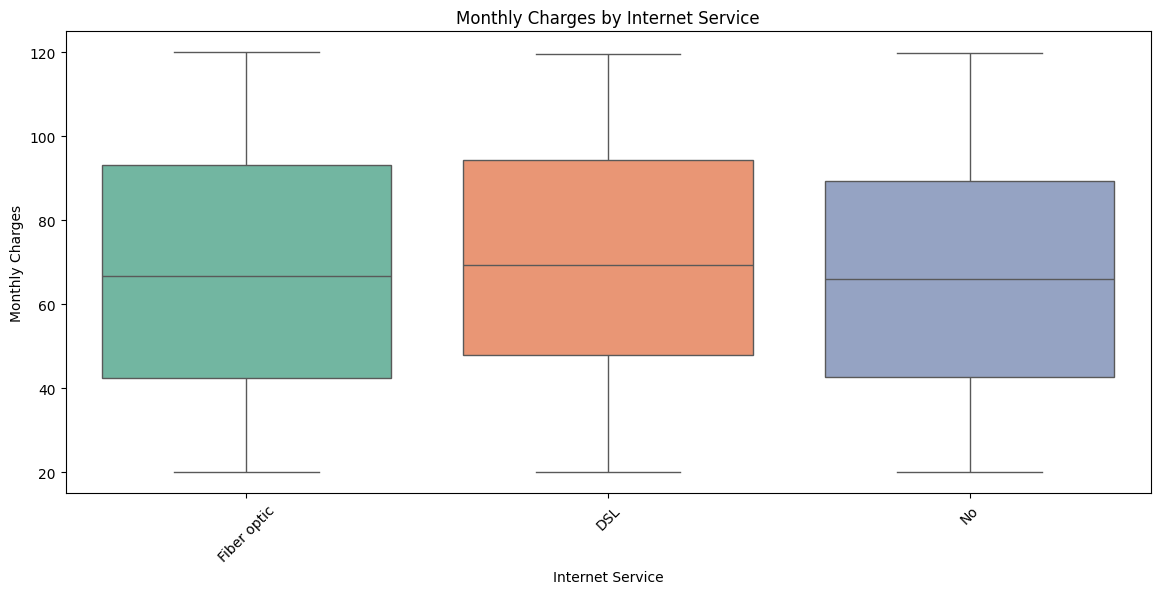

In [15]:
# Box plot for comparing a numeric variable across categories.

plt.figure(figsize=(14, 6))
sns.boxplot(data=customer_churn_data, x='InternetService', y='MonthlyCharges', palette='Set2')

plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Internet Service')
plt.xticks(rotation=45)
plt.show()

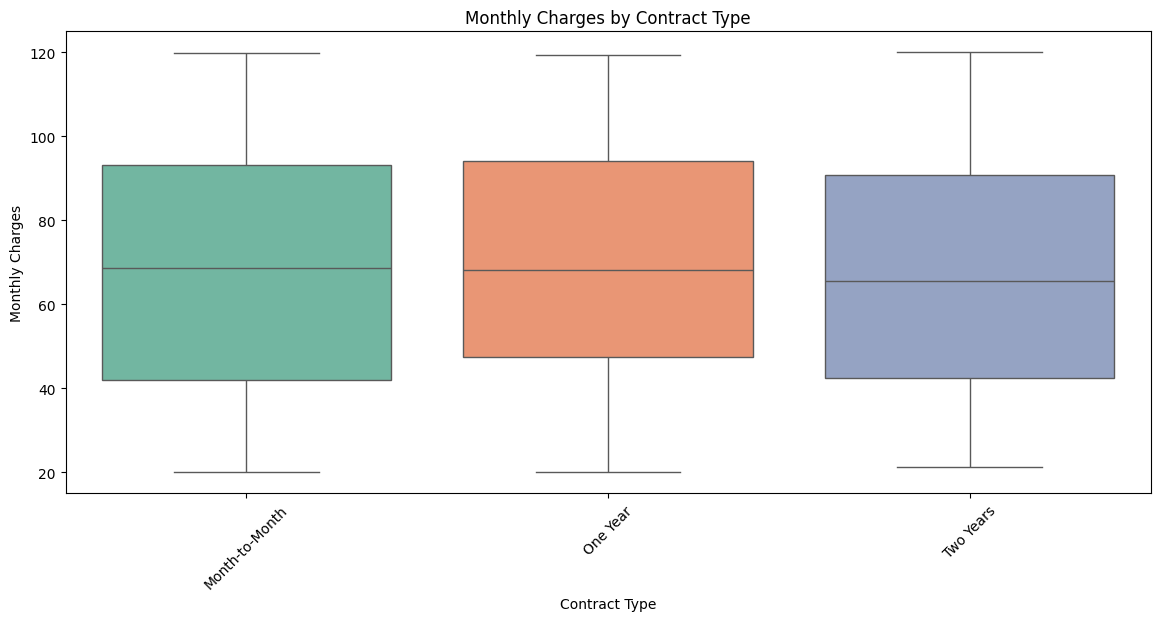

In [16]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=customer_churn_data, x='ContractType', y='MonthlyCharges', palette='Set2')

plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Contract Type')
plt.xticks(rotation=45)
plt.show()

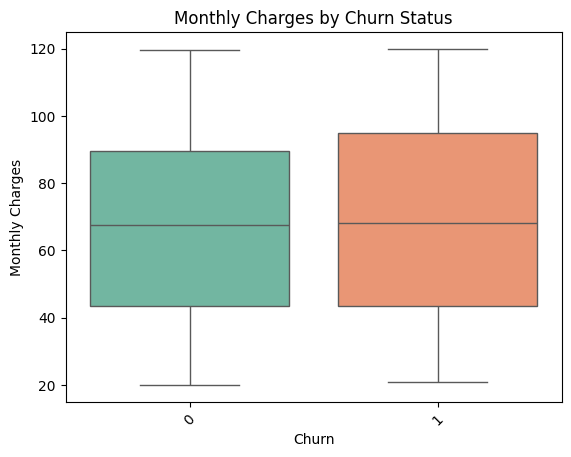

In [17]:
sns.boxplot(data=customer_churn_data, x='Churn', y='MonthlyCharges', palette='Set2')

plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')
plt.xticks(rotation=45)
plt.show()

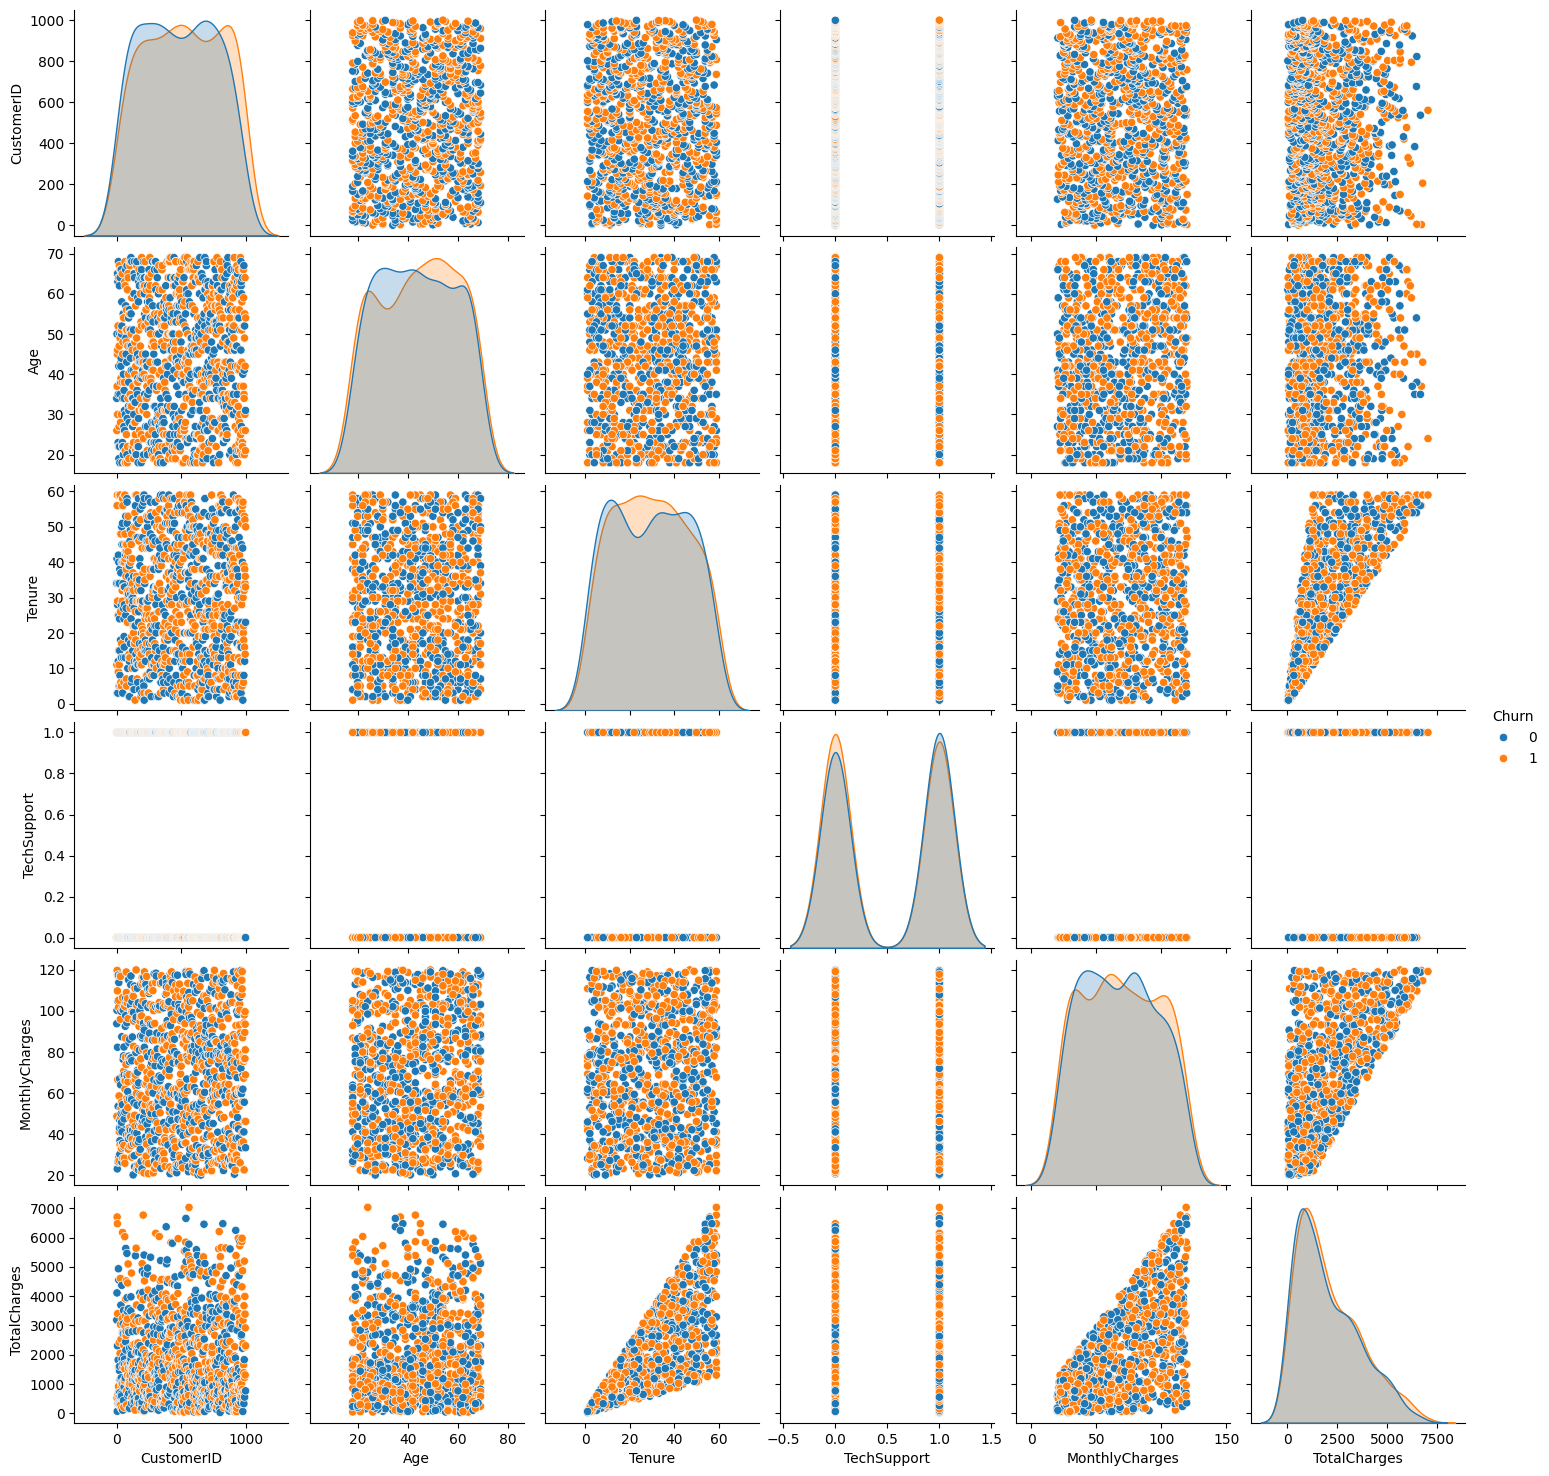

In [18]:
# Pair Plots: visualize relationships between all pairs of numeric variables in the dataset.

sns.pairplot(customer_churn_data, hue='Churn')
plt.show()

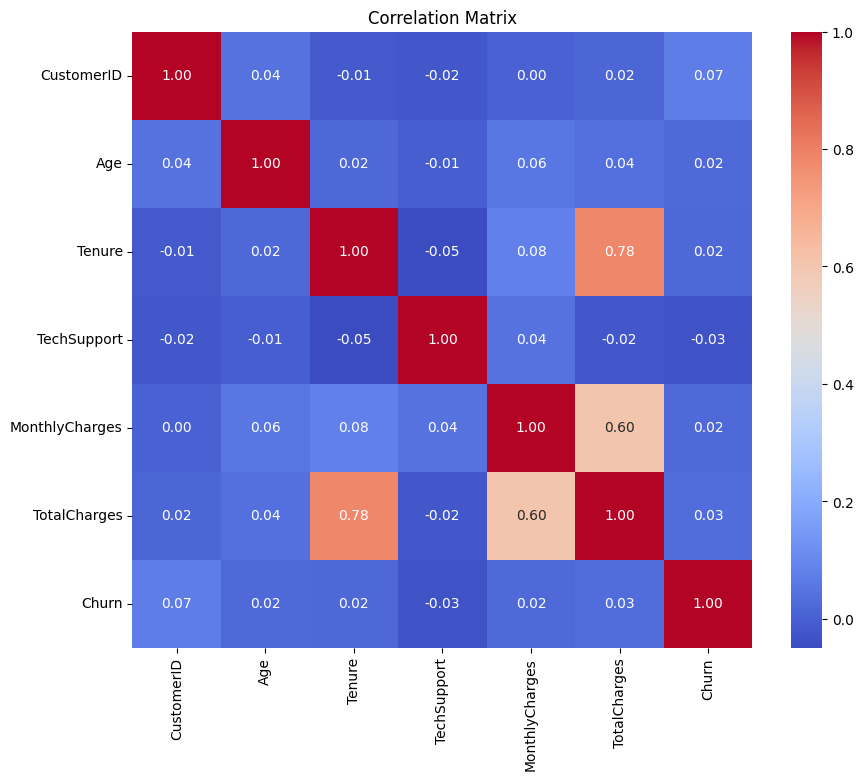

In [19]:
# Correlation matrix.

correlation_matrix = customer_churn_data.corr(numeric_only= True)

plt.figure(figsize=(10, 8))   # Create heatmap.  identify strong linear relationships between variables.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Group data by 'Churn' and calculated average monthly charges:

average_monthly_charges_by_churn = customer_churn_data.groupby('Churn')['MonthlyCharges'].mean()

average_monthly_charges_by_churn

,MonthlyCharges
Churn,
0,67.934465
1,69.142970


In [21]:
average_monthly_charges_by_gender = customer_churn_data.groupby('Gender')['MonthlyCharges'].mean()

average_monthly_charges_by_gender

,MonthlyCharges
Gender,
Female,69.012431
Male,68.058000


# **Modeling & Predictions:**

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

customer_churn_data['Gender'] = le.fit_transform(customer_churn_data['Gender'])   # 0: female, 1: male
customer_churn_data['ContractType'] = le.fit_transform(customer_churn_data['ContractType'])
customer_churn_data['InternetService'] = le.fit_transform(customer_churn_data['InternetService'])

**Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.

X = customer_churn_data.drop('Churn', axis=1)   # Excluded the 'Churn' column for the model.
y = customer_churn_data['Churn']    # Target variable is Churn.

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


**Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Create and train the model:**

**Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Prediction.

y_pred_logreg = logreg.predict(X_test_scaled)

y_pred_logreg

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1])

In [75]:
# Check accuracy Score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

Logistic Regression Accuracy: 53.00%


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.48      0.57      0.52        90
           1       0.59      0.50      0.54       110

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.53      0.53       200



In [30]:
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1_score * 100:.2f}%")

Precision: 58.51%
Recall: 50.00%
F1 Score: 53.92%


In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
conf_matrix_logreg

Confusion Matrix:


array([[51, 39],
       [55, 55]])

Text(50.722222222222214, 0.5, 'Actual')

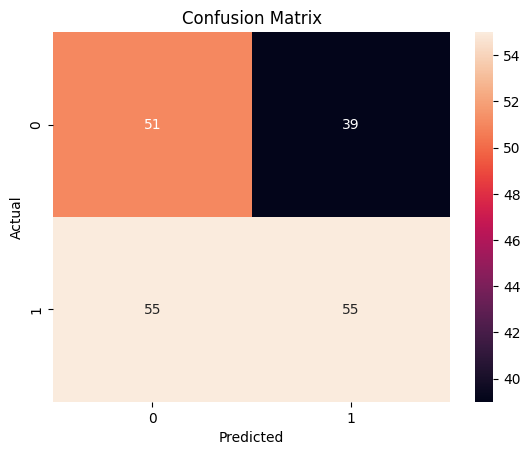

In [32]:
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
logreg.score(X_train_scaled, y_train)

0.56

In [34]:
logreg.score(X_test_scaled, y_test)

0.53

**Cross Validation**

In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)

print(f'Cross-validation scores: {cv_scores}')

print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.46875 0.5375  0.4875  0.53125 0.51875]
Mean cross-validation score: 0.50875


**Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty' : ['l1', 'l2']}

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)


Best Model: LogisticRegression(C=0.1)
Best Score: 0.5137499999999999


**Decision Tree Model**

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [57]:
y_pred_dt = dt_classifier.predict(X_test_scaled)

y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1])

In [58]:
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy:  {accuracy_dt *100 :.2f}%")

Decision Tree Accuracy:  51.50%


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.46      0.51      0.49        90
           1       0.56      0.52      0.54       110

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.52       200



In [60]:
from sklearn.metrics import confusion_matrix

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
conf_matrix_dt

Confusion Matrix:


array([[46, 44],
       [53, 57]])

Text(50.722222222222214, 0.5, 'Actual')

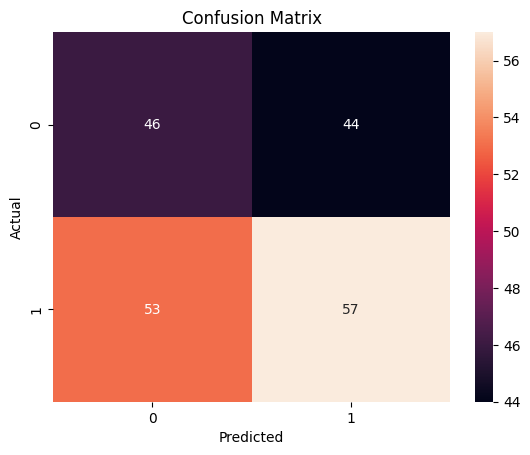

In [61]:
sns.heatmap(conf_matrix_dt, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [62]:
dt_classifier.score(X_train_scaled, y_train)

1.0

In [63]:
dt_classifier.score(X_test_scaled, y_test)

0.515

**Cross Validation**

In [64]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=5)

print(f'Cross-validation scores: {cv_scores}')

print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.5     0.5     0.4875  0.525   0.46875]
Mean cross-validation score: 0.49625


**HyperParameter Tuning**

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print(f"Best Score: {best_score * 100:.2f}%")

Best Model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Best Score: 51.50%


In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

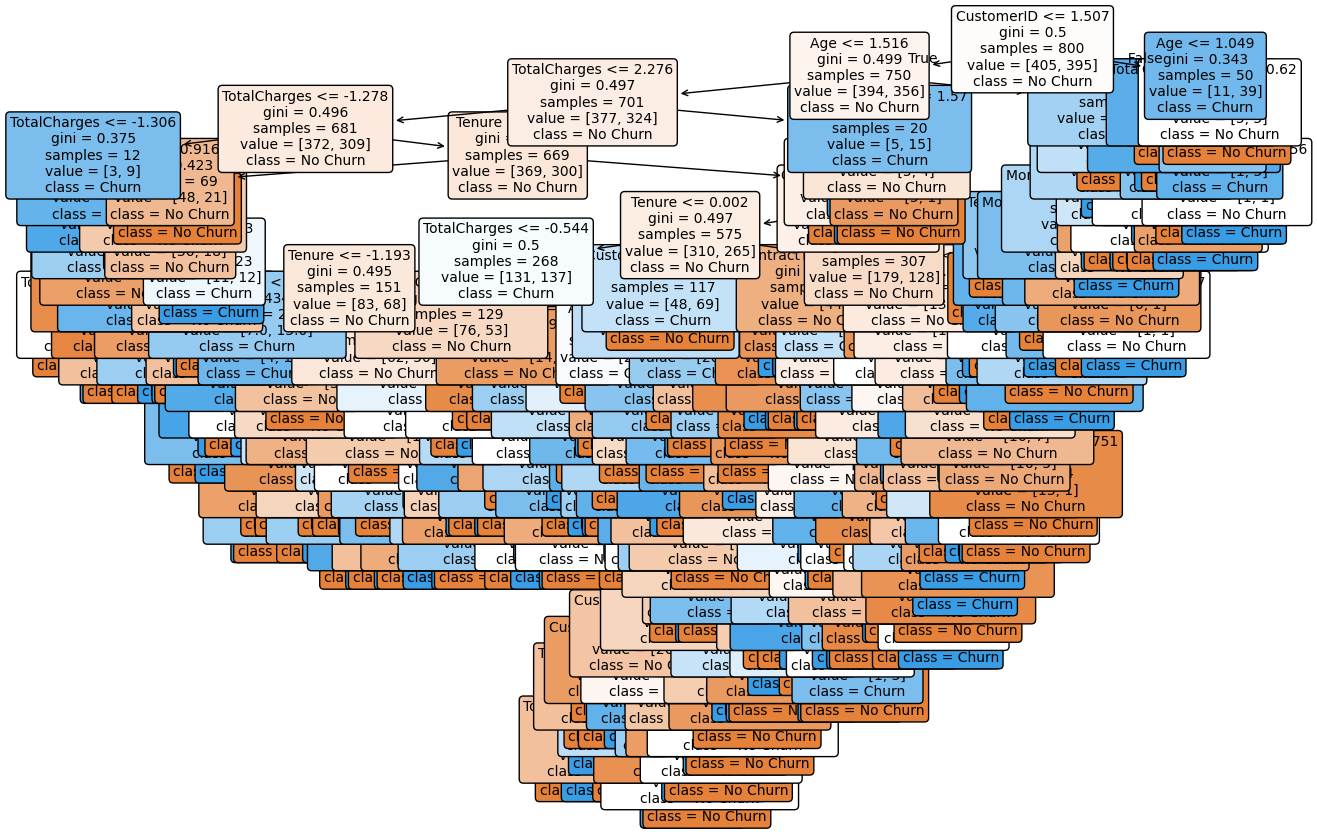

In [67]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier,
          feature_names=X.columns,  # Use column names for features
          class_names=['No Churn', 'Churn'],
          filled=True,  # Fill nodes with colors
          rounded=True,  # Round node corners
          fontsize=10)
plt.show()

**K Nearest Neighbors (k-NN)**

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [69]:
y_pred = knn_classifier.predict(X_test_scaled)

In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 48.00%


In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Precision: 52.94%
Recall: 49.09%
F1 Score: 50.94%


In [72]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[42, 48],
       [56, 54]])

**Different algorithms to find the best accuracy**

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [74]:
# Some Different model Accuracies.
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 50.50%
Gradient Boosting Accuracy: 48.00%
Support Vector Machine Accuracy: 52.00%


# **Insights & Recommendations:**

**Key Insights:**

**Monthly Charges and Churn:**

There's a noticeable correlation between higher monthly charges and increased churn rates. Customers paying more are more likely to leave.

**Contract Type and Churn:**

Customers with month-to-month contracts have a significantly higher churn rate compared to those with longer-term contracts. This suggests a preference for flexibility and a lower commitment among churners.

**Internet Service and Churn:**

Customers with fiber optic internet service tend to have higher monthly charges and a slightly higher churn rate compared to those with DSL. This could be due to the higher cost of fiber optic or potentially higher expectations associated with this service.

**Tenure and Churn:**

As expected, there's an inverse relationship between tenure and churn. Customers who have been with the company longer are less likely to churn.



---



**Actionable Recommendations to Reduce Customer Churn :-**

**1. Address High Monthly Charges :**

**Offer Incentives :**

Provide discounts or promotions to customers with high monthly charges to incentivize them to stay.

**Review Pricing Strategies :**

Analyze pricing plans to ensure they are competitive and offer value for the cost. Consider introducing tiered pricing with more affordable options.

**Bundle Services :**

Encourage customers to bundle services to reduce their overall cost and increase their perceived value.


**2. Promote Longer-Term Contracts :**

**Offer Incentives :**

Provide discounts or benefits for customers who sign up for longer-term contracts.

**Highlight Value :**

Emphasize the long-term benefits and cost savings associated with longer contracts.

**Flexibility Options :**

Consider offering flexible contract options with shorter cancellation periods to cater to customers who prefer flexibility but might be willing to commit for a longer duration.

**3.Improve Fiber Optic Service and Perception :**

**Address Service Issues :**

Proactively monitor and address any service-related issues reported by fiber optic customers.

**Manage Expectations :**

Clearly communicate the features and benefits of fiber optic internet to ensure customers understand its value proposition.

**Offer Competitive Pricing :**

Evaluate pricing strategies for fiber optic services to ensure they remain competitive within the market.

**4.Enhance Customer Loyalty Programs :**

**Reward Loyal Customers :**

Implement a rewards program that offers benefits or exclusive perks to long-term customers.

**Personalized Offers :**

Provide tailored recommendations and promotions based on individual customer preferences and usage patterns.

**Proactive Engagement :**

Regularly engage with customers through personalized communication and feedback mechanisms to demonstrate their value.

**5.Improve Customer Service :**

**Proactive Support :**

Identify and address potential churn risks by proactively reaching out to customers who exhibit signs of dissatisfaction.

**Personalized Interactions :**

Train customer service representatives to provide empathetic and tailored solutions to customer inquiries.

**Feedback Mechanisms :**

Encourage and actively solicit customer feedback to identify areas for improvement and address pain points.



---

